In [1]:
from tensorflow.keras import datasets
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [2]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [3]:
from tensorflow.keras.applications.resnet50 import ResNet50
base_model = ResNet50(include_top=True, input_shape = (224, 224 ,3), weights = 'imagenet')

In [4]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [5]:
import tensorflow as tf

In [6]:
base_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')

for i in range(5):
  inputs = test_images[i]
  inputs = tf.expand_dims(inputs, axis=0)
  x = tf.keras.layers.experimental.preprocessing.Resizing(224, 224)(inputs)
  x = tf.keras.applications.resnet50.preprocess_input(x)
  base_model.evaluate(x, test_labels[i])

1/1 [==============================] - 0s 65ms/step - loss: 12.2392 - accuracy: 0.0000e+00


1/1 [==============================] - 1s 541ms/step


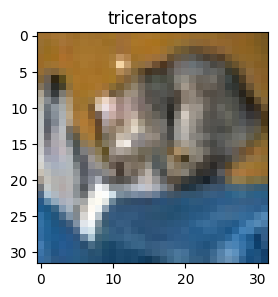

1/1 [==============================] - 0s 80ms/step


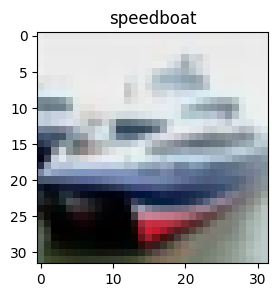

1/1 [==============================] - 0s 77ms/step


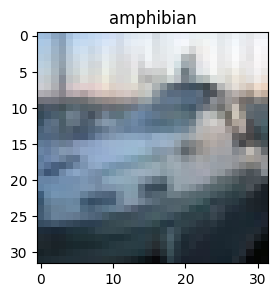

1/1 [==============================] - 0s 79ms/step


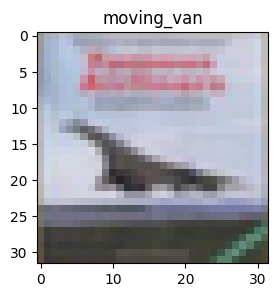

1/1 [==============================] - 0s 72ms/step


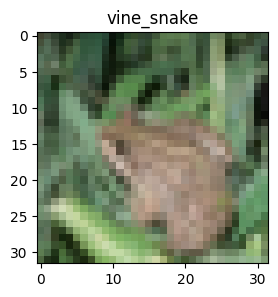

In [7]:
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import decode_predictions

for i in range(5):

    inputs = test_images[i]
    inputs = tf.expand_dims(inputs, axis=0)
    x = tf.keras.layers.experimental.preprocessing.Resizing(224, 224)(inputs)
    x = tf.keras.applications.resnet50.preprocess_input(x)

    preds = base_model.predict(x)

    fig = plt.figure(figsize=(3,3))
    plt.title(decode_predictions(preds, top=1)[0][0][1])
    plt.imshow(test_images[i])
    plt.show()

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D
from tensorflow.keras import datasets
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import Input
from tensorflow.keras.layers import Dropout, BatchNormalization


# 데이터셋 불러오기
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# ResNet50 불러오기 -> include_top = False로 바꾸는 것이 포인트
base_model = ResNet50(include_top=False, pooling = 'avg' , input_shape = (32,32 ,3), weights = 'imagenet')
base_model.trainable = False

# label(target) 데이터를 수치화 해준다. -> 안해줘도 loss 방법을 (sparse)로하면 되긴한다.
input_y = tf.keras.utils.to_categorical(train_labels, 10)
test_y = tf.keras.utils.to_categorical(test_labels, 10)

# 모델 layer 설계
inputs = Input(shape=(32,32,3))
x = tf.keras.layers.experimental.preprocessing.Resizing(32, 32)(inputs)
x = tf.keras.applications.resnet50.preprocess_input(inputs)
x = base_model(x, training = False)
x = Flatten()(x)								# Fully Connected에 온전하게 학습을 위해 펼쳐준다	
outputs = Dense(10, activation = 'softmax')(x)	# Softmax 함수로 10개 분류하는 분류기 
model_res = tf.keras.Model(inputs, outputs)	# model_res 란 이름의 인풋과 아웃풋이 정해진 모델 생성

In [9]:
model_res.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 tf.__operators__.getitem (S  (None, 32, 32, 3)        0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 32, 32, 3)        0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 10)                20490     
                                                             

In [10]:
model_res.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                    loss = 'categorical_crossentropy',
                    metrics=['accuracy'])
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

model_res.fit(train_images, input_y, epochs = 10, validation_data=(test_images, test_y), batch_size= 256, callbacks=[early])

Epoch 1/10
196/196 [==============================] - 48s 240ms/step - loss: 2.9626 - accuracy: 0.5574 - val_loss: 2.5263 - val_accuracy: 0.5954
Epoch 2/10
196/196 [==============================] - 47s 239ms/step - loss: 2.3368 - accuracy: 0.6156 - val_loss: 2.6217 - val_accuracy: 0.5997
Epoch 3/10
196/196 [==============================] - 46s 237ms/step - loss: 2.3769 - accuracy: 0.6262 - val_loss: 3.2240 - val_accuracy: 0.5988
Epoch 4/10
196/196 [==============================] - 47s 238ms/step - loss: 2.3768 - accuracy: 0.6387 - val_loss: 3.1161 - val_accuracy: 0.5907
Epoch 5/10
196/196 [==============================] - 46s 235ms/step - loss: 2.4947 - accuracy: 0.6388 - val_loss: 3.5647 - val_accuracy: 0.5889
Epoch 6/10
196/196 [==============================] - 46s 236ms/step - loss: 2.4634 - accuracy: 0.6468 - val_loss: 3.3172 - val_accuracy: 0.5964


In [11]:
save = model_res.fit(train_images, input_y, epochs= 10, validation_data=(test_images, test_y), batch_size = 256, callbacks=[early])

Epoch 1/10
196/196 [==============================] - 46s 235ms/step - loss: 2.4721 - accuracy: 0.6502 - val_loss: 3.5557 - val_accuracy: 0.5789
Epoch 2/10
196/196 [==============================] - 46s 234ms/step - loss: 2.5461 - accuracy: 0.6517 - val_loss: 3.7178 - val_accuracy: 0.5841
Epoch 3/10
196/196 [==============================] - 47s 238ms/step - loss: 2.5118 - accuracy: 0.6520 - val_loss: 3.4842 - val_accuracy: 0.6019
Epoch 4/10
196/196 [==============================] - 47s 239ms/step - loss: 2.5412 - accuracy: 0.6558 - val_loss: 3.5007 - val_accuracy: 0.6040
Epoch 5/10
196/196 [==============================] - 46s 235ms/step - loss: 2.4689 - accuracy: 0.6558 - val_loss: 3.8787 - val_accuracy: 0.5860
Epoch 6/10
196/196 [==============================] - 42s 215ms/step - loss: 2.5986 - accuracy: 0.6592 - val_loss: 3.6094 - val_accuracy: 0.6057
Epoch 7/10
196/196 [==============================] - 46s 236ms/step - loss: 2.5790 - accuracy: 0.6596 - val_loss: 3.7895 - val_ac

In [12]:
base_model.trainable = True
for i in base_model.layers[:143]:
    i.trainable = False

for i in base_model.layers[140:]:
    print(i.name, i.trainable)

conv4_block6_3_bn False
conv4_block6_add False
conv4_block6_out False
conv5_block1_1_conv True
conv5_block1_1_bn True
conv5_block1_1_relu True
conv5_block1_2_conv True
conv5_block1_2_bn True
conv5_block1_2_relu True
conv5_block1_0_conv True
conv5_block1_3_conv True
conv5_block1_0_bn True
conv5_block1_3_bn True
conv5_block1_add True
conv5_block1_out True
conv5_block2_1_conv True
conv5_block2_1_bn True
conv5_block2_1_relu True
conv5_block2_2_conv True
conv5_block2_2_bn True
conv5_block2_2_relu True
conv5_block2_3_conv True
conv5_block2_3_bn True
conv5_block2_add True
conv5_block2_out True
conv5_block3_1_conv True
conv5_block3_1_bn True
conv5_block3_1_relu True
conv5_block3_2_conv True
conv5_block3_2_bn True
conv5_block3_2_relu True
conv5_block3_3_conv True
conv5_block3_3_bn True
conv5_block3_add True
conv5_block3_out True
avg_pool True


In [13]:
model_res.compile(optimizer = tf.keras.optimizers.Adam( learning_rate= 0.0001),
                  loss = 'categorical_crossentropy',
                  metrics=['accuracy'])

early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

model_res.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 tf.__operators__.getitem (S  (None, 32, 32, 3)        0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 32, 32, 3)        0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 10)                20490     
                                                             

In [14]:
save_fine = model_res.fit(train_images, input_y, epochs = 50, initial_epoch = save.epoch[-1],validation_data=(test_images, test_y), batch_size= 256, callbacks = [early])

Epoch 8/50
196/196 [==============================] - 449s 2s/step - loss: 1.4895 - accuracy: 0.6619 - val_loss: 1.4245 - val_accuracy: 0.6383
Epoch 9/50
196/196 [==============================] - 449s 2s/step - loss: 0.7915 - accuracy: 0.7581 - val_loss: 1.4759 - val_accuracy: 0.6524
Epoch 10/50
196/196 [==============================] - 448s 2s/step - loss: 0.4622 - accuracy: 0.8459 - val_loss: 1.5034 - val_accuracy: 0.6624
Epoch 11/50
196/196 [==============================] - 444s 2s/step - loss: 0.2523 - accuracy: 0.9150 - val_loss: 1.5260 - val_accuracy: 0.6751
Epoch 12/50
196/196 [==============================] - 448s 2s/step - loss: 0.1327 - accuracy: 0.9596 - val_loss: 1.5499 - val_accuracy: 0.6790
Epoch 13/50
196/196 [==============================] - 441s 2s/step - loss: 0.0619 - accuracy: 0.9872 - val_loss: 1.5958 - val_accuracy: 0.6846


In [15]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D
from tensorflow.keras import datasets

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

from tensorflow.keras.applications.resnet50 import ResNet50
base_model = ResNet50(include_top=False, pooling = 'avg' , input_shape = (32,32 ,3), weights = None)

base_model.trainable =True

input_y = tf.keras.utils.to_categorical(train_labels, 10)
test_y = tf.keras.utils.to_categorical(test_labels, 10)

from tensorflow.keras import Input

inputs = Input(shape=(32,32,3))
x = tf.keras.applications.resnet50.preprocess_input(inputs)
x = base_model(x, training=False)
x = Flatten()(x)
outputs = Dense(10, activation = 'softmax')(x)
model_res = tf.keras.Model(inputs, outputs)

In [16]:
model_res.compile(optimizer = 'adam', loss= 'categorical_crossentropy', metrics=['accuracy'])
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience= 5)

model_res.fit(train_images, input_y, epochs=30, batch_size=256, validation_data=(test_images, test_y), callbacks=[early])

Epoch 1/30
196/196 [==============================] - 547s 3s/step - loss: 2.3251 - accuracy: 0.3255 - val_loss: 1.4858 - val_accuracy: 0.4597
Epoch 2/30
196/196 [==============================] - 537s 3s/step - loss: 1.3205 - accuracy: 0.5197 - val_loss: 1.2046 - val_accuracy: 0.5620
Epoch 3/30
196/196 [==============================] - 521s 3s/step - loss: 1.1440 - accuracy: 0.5881 - val_loss: 1.1876 - val_accuracy: 0.5752
Epoch 4/30
196/196 [==============================] - 544s 3s/step - loss: 0.9943 - accuracy: 0.6441 - val_loss: 1.0826 - val_accuracy: 0.6157
Epoch 5/30
196/196 [==============================] - 560s 3s/step - loss: 0.8898 - accuracy: 0.6831 - val_loss: 1.0126 - val_accuracy: 0.6495
Epoch 6/30
196/196 [==============================] - 548s 3s/step - loss: 0.7741 - accuracy: 0.7238 - val_loss: 0.9814 - val_accuracy: 0.6663
Epoch 7/30
196/196 [==============================] - 540s 3s/step - loss: 0.6891 - accuracy: 0.7573 - val_loss: 0.9443 - val_accuracy: 0.6772